In [51]:
import mplcursors
import pandas as pd
import psycopg2
conn = psycopg2.connect(dbname='postgres', user = 'postgres', password = '123', host='localhost', port='5432')
fiscal_operations_query = """
SELECT ledger_fiscal_operations.*, ledger_operation_type.name AS operation_type_name, ledger_shop.name AS shop_name
FROM ledger_fiscal_operations
JOIN ledger_operation_type ON ledger_fiscal_operations.operation_type_id = ledger_operation_type.id
JOIN ledger_shop ON ledger_fiscal_operations.shop_id = ledger_shop.id
"""
fiscal_operations_df = pd.read_sql(fiscal_operations_query, conn)
fiscal_operations_df = fiscal_operations_df.drop(['operation_type_id', 'shop_id', 'created_at'], axis = 1)
fiscal_operations_df



C:\Users\Kargo\AppData\Local\Temp\ipykernel_15016\874950101.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fiscal_operations_df = pd.read_sql(fiscal_operations_query, conn)


,id,date,amt,rrn,operation_type_name,shop_name
0,3,2023-03-20,314.20,999889043121,Покупка,Сильпо
1,4,2023-03-20,109.52,100049074018,Покупка,Box Express Market
2,5,2023-03-20,300.00,5,Коммуникации,Київстар(Інтернет)
3,6,2023-03-20,280.00,6,Коммуникации,Vodafone
4,7,2023-03-20,125.30,7,Онлайн-покупка,EGS
...,...,...,...,...,...,...
109,110,2023-04-21,65.40,110,Покупка,Box Express Market
110,111,2023-04-21,65.40,111,Покупка,Box Express Market
111,112,2023-04-21,8.00,112,Транспорт,Метро
112,113,2023-04-21,8.00,113,Транспорт,Метро


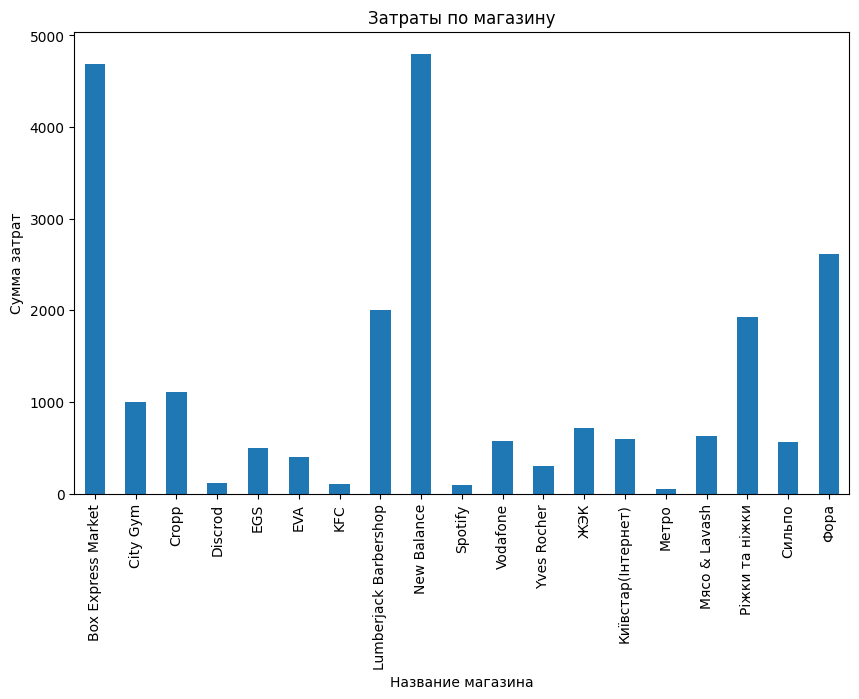

In [52]:
fiscal_operations_df = fiscal_operations_df[fiscal_operations_df['shop_name']!= 'Банкомат']
amt_by_shop = fiscal_operations_df.groupby('shop_name')['amt'].sum()
import matplotlib.pyplot as plt 
amt_by_shop.plot(kind='bar', figsize=(10,6))
plt.xlabel('Название магазина')
plt.ylabel('Сумма затрат')
plt.title('Затраты по магазину')
plt.show()

In [55]:
product_name_query = """
SELECT ledger_fiscal_operations.*, ledger_shop.name as shop, ledger_category.name as category_name FROM ledger_fiscal_operations 
JOIN ledger_shop ON ledger_fiscal_operations.shop_id = ledger_shop.id
JOIN ledger_category ON ledger_shop.category_id = ledger_category.id
WHERE ledger_category.name = 'Продукты'
"""
product_name_df = pd.read_sql(product_name_query, conn)
product_name_df = product_name_df.drop(['operation_type_id', 'created_at', 'shop_id', 'date'], axis = 1)
product_name_df


C:\Users\Kargo\AppData\Local\Temp\ipykernel_15016\2967202175.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_name_df = pd.read_sql(product_name_query, conn)


,id,amt,rrn,shop,category_name
0,3,314.20,999889043121,Сильпо,Продукты
1,4,109.52,100049074018,Box Express Market,Продукты
2,9,59.60,100055963395,Box Express Market,Продукты
3,11,234.79,100010472036,Фора,Продукты
4,12,118.00,12,Ріжки та ніжки,Продукты
...,...,...,...,...,...
76,107,369.55,100073080221,Ріжки та ніжки,Продукты
77,108,368.10,100042648838,Box Express Market,Продукты
78,109,120.37,100004694340,Фора,Продукты
79,110,65.40,110,Box Express Market,Продукты


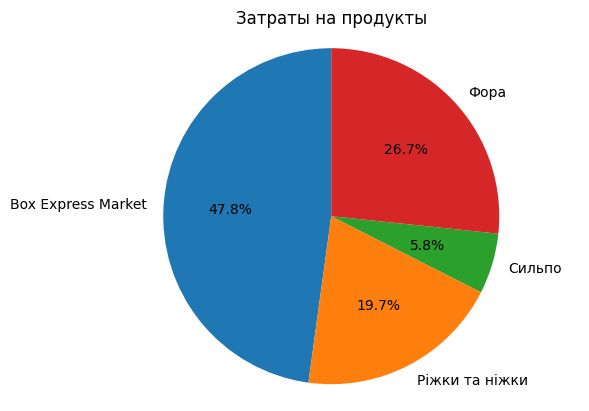

In [56]:
grouped = product_name_df.groupby('shop').sum()
plt.pie(grouped['amt'], labels = grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Затраты на продукты')
plt.axis('equal')
plt.show()

In [59]:
category_sequance = """
SELECT ledger_fiscal_operations.*, ledger_shop.name as shop, ledger_category.name as category_name FROM ledger_fiscal_operations 
JOIN ledger_shop ON ledger_fiscal_operations.shop_id = ledger_shop.id
JOIN ledger_category ON ledger_shop.category_id = ledger_category.id
"""
category_df = pd.read_sql(category_sequance,conn)
category_df = category_df.drop(['operation_type_id', 'date', 'created_at', 'rrn'], axis=1)
category_df

C:\Users\Kargo\AppData\Local\Temp\ipykernel_15016\3292653193.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_df = pd.read_sql(category_sequance,conn)


,id,shop_id,amt,shop,category_name
0,3,4,314.20,Сильпо,Продукты
1,4,14,109.52,Box Express Market,Продукты
2,5,18,300.00,Київстар(Інтернет),Коммуникации
3,6,17,280.00,Vodafone,Коммуникации
4,7,21,125.30,EGS,Развлечения и спорт
...,...,...,...,...,...
109,110,14,65.40,Box Express Market,Продукты
110,111,14,65.40,Box Express Market,Продукты
111,112,16,8.00,Метро,Транспорт
112,113,16,8.00,Метро,Транспорт


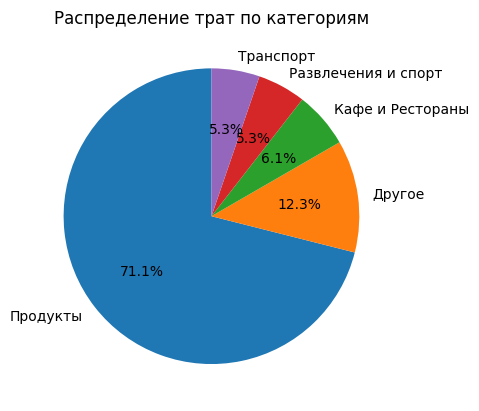

In [77]:
category_counts = category_df['category_name'].value_counts()
total_count = category_counts.sum()
category_counts_percentage = category_counts / total_count * 100
small_categories = category_counts_percentage[category_counts_percentage < 5].index.tolist()
category_df['category_name'] = category_df['category_name'].apply(lambda x: 'Другое' if x in small_categories else x)
aggregated_category_counts = category_df['category_name'].value_counts()
plt.pie(aggregated_category_counts, labels=aggregated_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение трат по категориям')
plt.show()
conn.close()